In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# collected peak-to-peak voltage data from low frequency to high frequency
freq = np.array([50, 100, 500, 1000, 10000, 50000]) #Hz
Vr = np.array([0.47,0.92,4.19,6.58,9.06,8.62]) #v
Vc = np.array([9.45,9.34,8.55,6.85,1.05,0.24]) #v
Vs = np.array([9.59,9.55,9.65,9.63,9.17,8.65]) #v

In [16]:
# collected data from network analyzer
cap = np.loadtxt('capacitor_data.csv', skiprows=1, delimiter=',')
res = np.loadtxt('resistor_data.csv', skiprows=1, delimiter=',')

cap_freq = cap[:,1]
cap_gain = cap[:,2]
cap_phasediff = cap[:,3]

res_freq = res[:,1]
res_gain = res[:,2]
res_phasediff = res[:,3]

In [17]:
# calculating gain
gain_vr = Vr / Vs
gain_vc = Vc / Vs

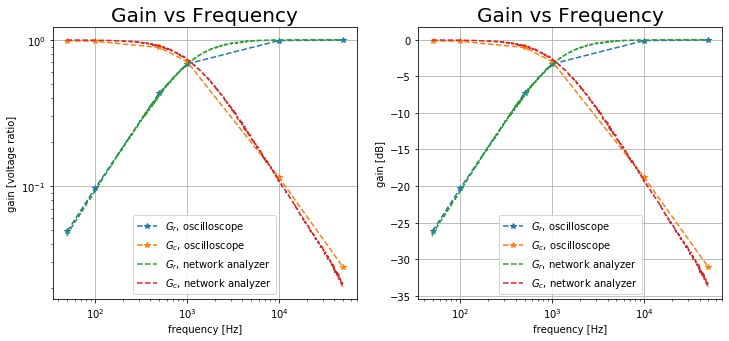

In [48]:
# plotting gain vs frequency
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Gain vs Frequency',fontsize=20)
plt.ylabel('gain [voltage ratio]')
plt.xlabel('frequency [Hz]')
plt.loglog(freq, gain_vr, '*--', label='$G_r$, oscilloscope')
plt.loglog(freq, gain_vc, '*--', label='$G_c$, oscilloscope')
plt.loglog(res_freq, 10**(res_gain/20), '--', label='$G_r$, network analyzer')
plt.loglog(cap_freq, 10**(cap_gain/20), '--', label='$G_c$, network analyzer')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.title('Gain vs Frequency',fontsize=20)
plt.ylabel('gain [dB]')
plt.xlabel('frequency [Hz]')
plt.semilogx(freq, 20*np.log10(gain_vr), '*--', label='$G_r$, oscilloscope')
plt.semilogx(freq, 20*np.log10(gain_vc), '*--', label='$G_c$, oscilloscope')
plt.semilogx(res_freq, res_gain, '--', label='$G_r$, network analyzer')
plt.semilogx(cap_freq, cap_gain, '--', label='$G_c$, network analyzer')
plt.legend()
plt.grid()

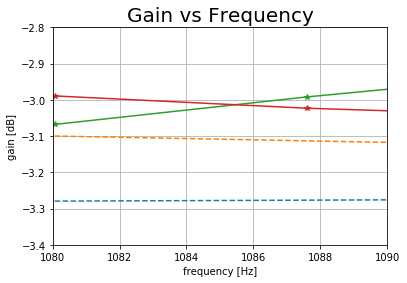

In [63]:
plt.title('Gain vs Frequency',fontsize=20)
plt.ylabel('gain [dB]')
plt.xlabel('frequency [Hz]')
plt.xlim(1080, 1090)
plt.ylim(-3.4,-2.8)
plt.plot(freq, 20*np.log10(gain_vr), '*--', label='$G_r$, oscilloscope')
plt.plot(freq, 20*np.log10(gain_vc), '*--', label='$G_c$, oscilloscope')
plt.plot(res_freq, res_gain, '*-', label='$G_r$, network analyzer')
plt.plot(cap_freq, cap_gain, '*-', label='$G_c$, network analyzer')
#plt.legend()
plt.grid()

In [35]:
# collected time difference data from low frequency to high frequency
tdiff_vr = np.array([0.004138, 0.003285, 0.000347, 0.000123, 0.00000174, 0]) #s
tdiff_vc = np.array([-0.001074, -0.000284, -0.000126, -0.000126, -0.000023, -0.000004]) #s

In [36]:
# calculating phase difference
phase_diff_vr = 360 * freq * tdiff_vr
phase_diff_vc = 360 * freq * tdiff_vc

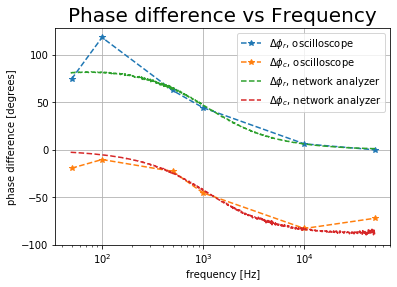

In [46]:
# plotting phase difference vs frequency
plt.title('Phase difference vs Frequency',fontsize=20)
plt.ylabel('phase difference [degrees]')
plt.xlabel('frequency [Hz]')
plt.semilogx(freq, phase_diff_vr, '*--', label='$\Delta \phi_r$, oscilloscope')
plt.semilogx(freq, phase_diff_vc, '*--', label='$\Delta \phi_c$, oscilloscope')
plt.semilogx(res_freq, res_phasediff, '--', label='$\Delta \phi_r$, network analyzer')
plt.semilogx(cap_freq, cap_phasediff, '--', label='$\Delta \phi_c$, network analyzer')
plt.legend()
plt.grid()

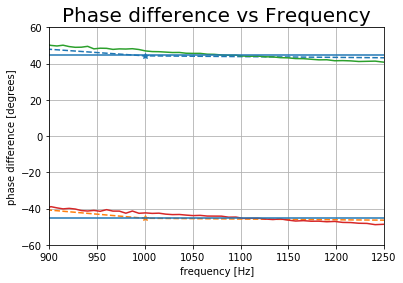

In [75]:
plt.title('Phase difference vs Frequency',fontsize=20)
plt.ylabel('phase difference [degrees]')
plt.xlabel('frequency [Hz]')
plt.xlim(900,1250)
plt.ylim(-60,60)
plt.plot(freq, phase_diff_vr, '*--', label='$\Delta \phi_r$, oscilloscope')
plt.plot(freq, phase_diff_vc, '*--', label='$\Delta \phi_c$, oscilloscope')
plt.plot(res_freq, res_phasediff, '-', label='$\Delta \phi_r$, network analyzer')
plt.plot(cap_freq, cap_phasediff, '-', label='$\Delta \phi_c$, network analyzer')
plt.axhline(45, ls='-')
plt.axhline(-45, ls='-')
#plt.legend()
plt.grid()